## 2D s band crystal
The 1D model can be extended to 2D by adding a new set of nearhest neighbor vectors
In this case new dispersion relation becomes,

[Reading Material [[1]](https://lampx.tugraz.at/~hadley/ss2/lectures17/mar22.pdf),[[2]](http://lamp.tu-graz.ac.at/~hadley/ss1/bands/tbtable/tbtable.html),[[3]](http://lampx.tugraz.at/~hadley/ss1/bands/tightbinding/tightbinding.php)
]

$E(\mathbf{k})=\epsilon-t\sum_{\boldsymbol{n}} e^{i \mathbf{k} \cdot \boldsymbol{n}} $

$n_1=(\pm a,0) \qquad n_2=(0,\pm b)$

$E\left(k_{x}, k_{y}\right)=\epsilon-2 t_a \cos \left(k_{x} a\right)-2 t_b \cos \left(k_{y} b\right)$



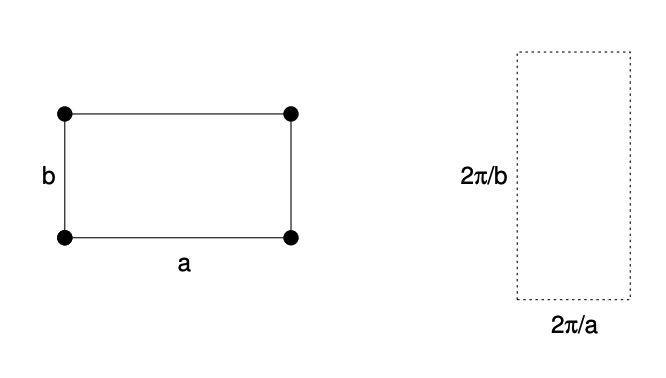

In [92]:
#Import Libraries

#Numerical manipulation
import numpy as np

#Plotting routine
import matplotlib.pyplot as plt

In [93]:
#Define constant

# On-site energy 
ϵ = 0.3 #eV

# Hopping constant
t_a = 0.5 # eV
t_b = 0.5 # eV

# Lattice spacing
a = 3  # Angstrom
b = 3  # Angstrom

# N number of unitcells
N = 100

# Reciprocal space length
g_a = 2*np.pi/a
g_b = 2*np.pi/b

# Define reciprocal space symmetrically
bz_a = np.linspace(-g_a/2,g_a/2,N)
bz_b = np.linspace(-g_b/2,g_b/2,N)

#Define k mesh
k_mesh = [[kx,ky]  for kx in bz_a for ky in bz_b]

#Convert list into array
k_mesh = np.array(k_mesh)

#Define kx and ky
kx, ky = k_mesh.T

In [3]:
#Define energy function
def square_2d_s_band(kx,ky,ϵ,t_a,t_b,a,b):
    E = ϵ - 2*t_a*np.cos(kx*a) - 2*t_b*np.cos(ky*b)
    return E

In [98]:
energy = square_2d_s_band(kx,ky,ϵ,t_a,t_b,a,b)

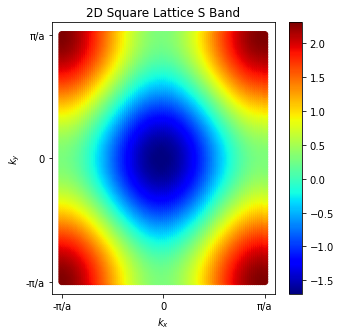

In [5]:
#Plot energy on 2d k space
fig = plt.figure(figsize=(5,5))
plt.scatter(kx,ky,c=energy,cmap="jet")
plt.title("2D Square Lattice S Band")
plt.xlabel(r"$k_x$")
plt.ylabel(r"$k_y$")
plt.xticks([np.min(kx),0,np.max(kx)],["-π/a","0","π/a"])
plt.yticks([np.min(ky),0,np.max(ky)],["-π/a","0","π/a"])
plt.colorbar()
plt.show()

In [102]:
# Define DOS function
def density_of_states(E,dE=1e-2):
    
    #Initial empty array for dos
    dos = np.zeros(len(E))
    
    #Iterate over each energy
    for i in range(len(E)):
        #Delta function approxiation for given value of energy over all states
        delta_array = np.where( abs(E[i]-E) < dE , np.ones(len(energy)),0)
        delta_average  = np.average(delta_array)
        dos[i] = delta_average
    return dos

In [103]:
#Calculate density of states for the given energy distribution
dos = density_of_states(energy,9e-2)

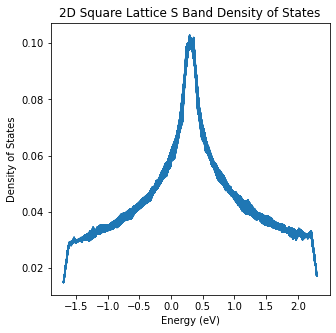

In [104]:
#Plot DOS on energy space
fig = plt.figure(figsize=(5,5))
plt.plot(energy,dos)
plt.title("2D Square Lattice S Band Density of States")
plt.xlabel("Energy (eV)")
plt.ylabel("Density of States")
plt.show()

### Calculate chemical potential, $\mu$, for given distribution number n

### $<n> = \frac{1}{N}\sum_{i}^{N} \frac{1}{1+e^{(E_i-\mu)\beta}}$
A root for $\mu$ can be found for a given $<n>$, $\beta=\frac{1}{k_bT}$
### $<n> - \frac{1}{N}\sum_{i}^{N} \frac{1}{1+e^{(E_i-\mu)\beta}} =0$

In [34]:
# Import root finding library 
from scipy import optimize

In [35]:
#Define Fermi-Dirac distribution
def fd(E,μ,T):
    return 1/(1+np.exp((E-μ)/T))

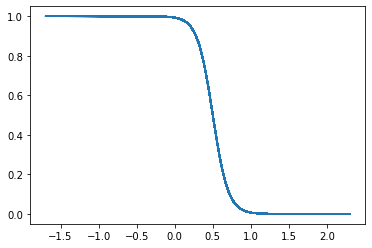

In [117]:
plt.plot(energy,fd(energy,μ=0.5,T=0.1))

In [105]:
#Define occupation number
def number_density(μ,E=energy,T=0.1):
    return np.average(fd(E,μ,T))

In [41]:
def number_equation(μ, n): # arguments with default values
    return n-number_density(μ)

In [132]:
# solve for chemical potential 
μ = optimize.root(lambda x: number_equation(x, n=1/2), x0=0).x[0]

In [133]:
#Data analysis library
import pandas as pd

#Fermi surface function
def fermi_surface(kx,ky,energy,μ,δ):
    df = pd.DataFrame()
    df["kx"]=kx
    df["ky"]=ky
    df["E"]=energy
    fs = df.query(f"{μ} - {δ} <= E <= {μ} + {δ}")
    return fs.kx,fs.ky

In [134]:
fs_kx, fs_ky = fermi_surface(kx,ky,energy,μ=μ,δ=0.02)

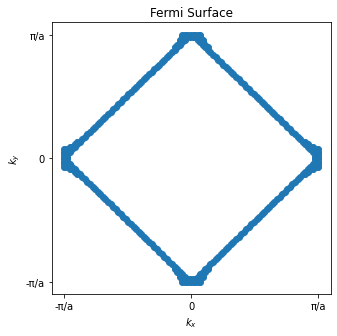

In [135]:
#Plot energy on 2d k space
fig = plt.figure(figsize=(5,5))
plt.scatter(fs_kx,fs_ky)
plt.title(f"Fermi Surface")
plt.xlabel(r"$k_x$")
plt.ylabel(r"$k_y$")
plt.xticks([np.min(kx),0,np.max(kx)],["-π/a","0","π/a"])
plt.yticks([np.min(ky),0,np.max(ky)],["-π/a","0","π/a"])
plt.show()